In [5]:
import pandas as pd


In [6]:
df=pd.read_csv("/content/twitter.csv")

In [8]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [12]:
df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [13]:
df.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


In [14]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [15]:
pip install nltk

In [16]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

In [17]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return tokens

In [23]:
# Load dataset from CSV file
df = pd.read_csv('/content/twitter.csv')

In [30]:
# Apply preprocessing to each text entry
df = pd.read_csv('/content/twitter.csv')

# Inspect column names
print(df.columns)

Index(['id', 'label', 'tweet'], dtype='object')


In [34]:
text_column_name = 'tweet'
df['processed_tweet'] = df[text_column_name].apply(preprocess_text)
df.to_csv('preprocessed_dataset.csv', index=False)

In [35]:
df

,id,label,tweet,processed_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[user, father, dysfunctional, selfish, drags, ..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[user, user, thanks, lyft, credit, cant, use, ..."
2,3,0,bihday your majesty,"[bihday, majesty]"
3,4,0,#model i love u take with u all the time in ...,"[model, love, u, take, u, time, urð±, ðð..."
4,5,0,factsguide: society now #motivation,"[factsguide, society, motivation]"
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,"[ate, user, isz, youuuðððððð..."
31958,31959,0,to see nina turner on the airwaves trying to...,"[see, nina, turner, airwaves, trying, wrap, ma..."
31959,31960,0,listening to sad songs on a monday morning otw...,"[listening, sad, songs, monday, morning, otw, ..."
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","[user, sikh, temple, vandalised, calgary, wso,..."


In [36]:
pip install nltk vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [37]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

In [38]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [40]:
# Load dataset from CSV file
df = pd.read_csv('/content/twitter.csv')

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get VADER sentiment scores
def get_vader_sentiment(text):
    scores = sid.polarity_scores(text)
    return scores['compound']

# Apply VADER sentiment analysis
df['vader_sentiment'] = df['tweet'].apply(get_vader_sentiment)

# Save the dataset with VADER sentiment scores
df.to_csv('vader_sentiment_dataset.csv', index=False)


In [41]:
df

,id,label,tweet,vader_sentiment
0,1,0,@user when a father is dysfunctional and is s...,-0.8296
1,2,0,@user @user thanks for #lyft credit i can't us...,0.6705
2,3,0,bihday your majesty,0.0000
3,4,0,#model i love u take with u all the time in ...,0.7249
4,5,0,factsguide: society now #motivation,0.0000
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,0.0000
31958,31959,0,to see nina turner on the airwaves trying to...,0.7269
31959,31960,0,listening to sad songs on a monday morning otw...,-0.7351
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",-0.5106


In [42]:
pip install matplotlib seaborn


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:
df = pd.read_csv('/content/twitter.csv')


<ipython-input-55-eca9c8d293ca>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


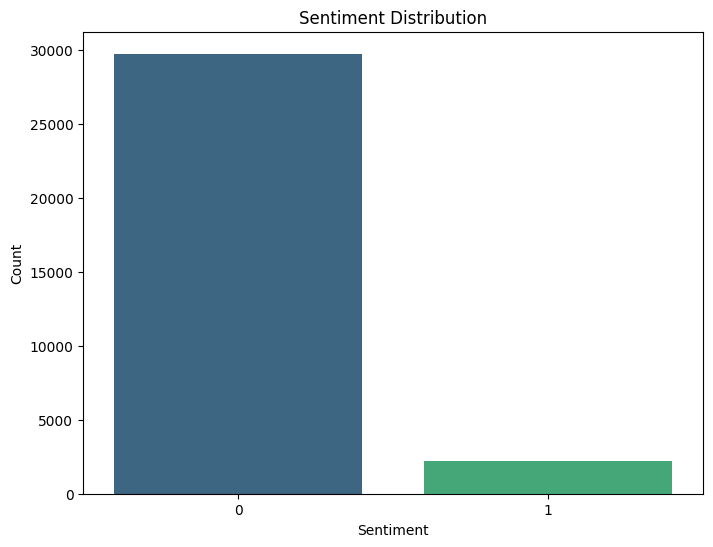

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/twitter.csv")

# Count the occurrences of each sentiment
sentiment_counts = df['label'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [61]:
print(df.columns)

Index(['id', 'label', 'tweet'], dtype='object')


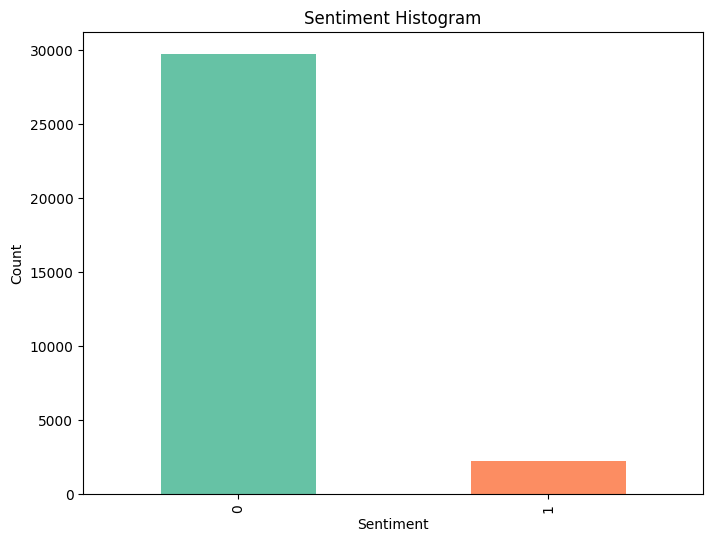

In [64]:
plt.figure(figsize=(8, 6))
df['label'].value_counts().plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Sentiment Histogram')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


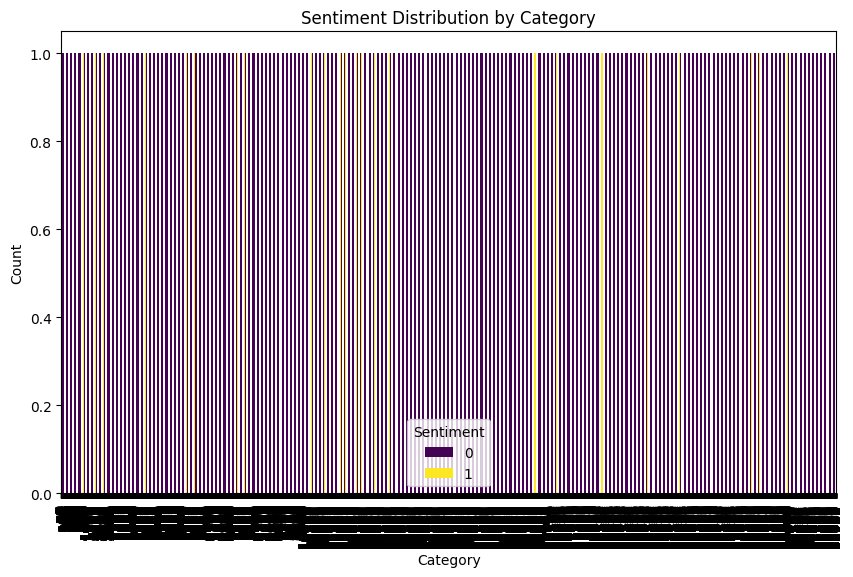

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("/content/twitter.csv")
sentiment_category = pd.crosstab(df['id'], df['label'])
# Plot the stacked bar chart
sentiment_category.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title('Sentiment Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()
